### UNIT 16. 숫자 인식 인공지능 만들기

---
#### 1. 개발환경 만들기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

---
#### 2. 데이터셋 불러오기

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


---
#### 3. mnist 데이터셋에서 X의 형태 바꾸기

In [9]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X Training matrix shape', X_train.shape)
print('X Testing matrix shape', X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


---
#### 4. mnist 데이터셋에서 Y의 형태 바꾸기

In [10]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print('Y Training matrix shape', Y_train.shape)
print('Y Testing matrix shape', Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


---
#### 5. 인공지능 모델 설계하기

In [12]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

---
#### 6. 모델 학습시키기

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8801 - loss: 0.4116
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9737 - loss: 0.0853
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9836 - loss: 0.0520
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9900 - loss: 0.0332
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9932 - loss: 0.0232
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9941 - loss: 0.0190
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9951 - loss: 0.0143
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9950 - loss: 0.0145
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9957 - loss: 0.0115


---
#### 7. 모델 정확도 살펴보기

In [14]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0994
Test score: 0.08265674114227295
Test accuracy: 0.9815000295639038


---
#### 8. 모델 학습 결과 확인하기

In [17]:
predicated_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


---
#### 9. 잘 예측한 데이터 살펴보기

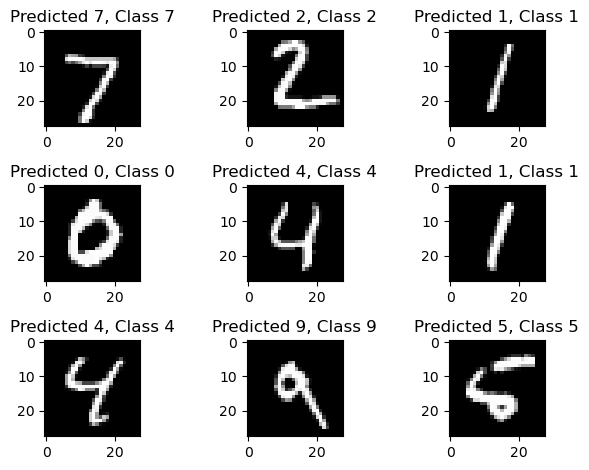

In [20]:
plt.figure()

for i in range(9):
    plt.subplot(3, 3, i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicated_classes[correct], y_test[correct]))

plt.tight_layout()

---
#### 10. 잘 예측하지 못한 데이터 살펴보기

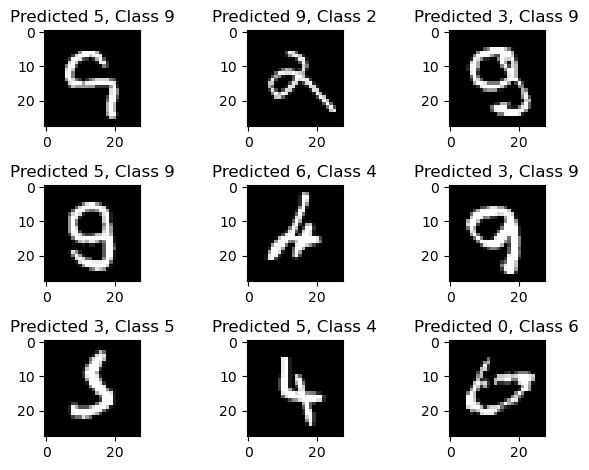

In [21]:
plt.figure()

for i in range(9):
    plt.subplot(3, 3, i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicated_classes[incorrect], y_test[incorrect]))

plt.tight_layout()